## Choosing the appropriate machine learning algorithm

Choosing the right ML algorithm is half systematic and half case-sensitive. What does that mean? From one prospective, there are few general steps you can save them as a crutch when you select the right ML model! However, from another prospective, your problem/data might be very unique and need to be carefully analyzed in order to select the right ML model!

So, for any machine learning problem, we need to throw these questions to select the right model:

1- Is our data labeled or not?

Yes ---> Supervised Learning

Is the output "Label" discrete or continuous?

Discrete ---> Classification

Continuous ---> Regression

Anomaly Detection ---> The goal here is to identify data points that are simply unusual (e.x., Fraud Detection problem when we have highly unusual credit card spending patterns)

No ---> Unsupervised Learning (Clustering)

2- Do we need to interact with the environment to optimize the objective function?

Yes ---> Reinforcement Learning


Now that we have a clear picture about our data, we can answer the previous questions directly: Yes, we have labeled, continuous data ---> Supervised Learning "Regression"

That lead us to a smaller set of ML algorithms where we deal with continuous labeled data: Linear Regression, Bayesian Linear Regression, Decision Forest Regression, Boosted Decision Tree Regression, Fast Forest Quantile Regression, Poisson Regression, Ordinal Regression, and Neural Network Regression.

Here, we reach the second option, mentioned above, for the model selection: a case sensitive task! This requires awareness of many factors that characterizing our problem, mainly: Accuracy, linearity, training time, the number of parameters (e.g., number of iterations, error tolerance, etc), and the number of features.

Finally, we need to highlight that "No free lunch" with machine learning models. We need to figure out what requirement(s) we want to pay more for it!

So, we have a large number of observations for the three cities. 

In our particular problem, we have the renting price as the target variable to predict. For the three cities, the price shows a continuous increase over time. In other words, the late you book a listing on Airbnb, the cheaper price you can get!! 

At the previous step, our exploratory analysis has shown that we have non-linear connections between our features and the average price. However, this does not say that there is no correlation between them. Some of our features have shown good correlation with the price such as the people accommodation represented mainly by the sharing and the quantity of the available bedrooms, beds, and bathrooms.  Even, with some features that show no correlation with the price, they can help us in modeling our target variable. For example, the number of review stars show no direct correlation with the average price; however, it can help to explain other connections such as the variation of the price among different neighborhoods. 


# Linear Regression

Linear models either the simple or Bayesian regression models are very popular to use in regression problems due to their simplicity and easy to interpret. However, in our case, I think they are not suitable to use because:

1-	The relationship between the price and the predictors are non-linear as shown in the exploratory analysis. So, those linear models will fail to capture that non-linearity. 

2-	Also, with the large number of features (>10) we have, linear regression models are very prone to overfitting.


#  Decision Forest Regression 

Decision trees are non-parametric models that splits the data in the form of a tree structure! It performs a sequence of simple tests for each data point, forming a binary tree data structure until a leaf node (decision) is reached.

It can be one of our candidates for modeling our data. As we have some nonlinearity in our data, Decision Forest Regression can represent non-linear decision boundaries in Airbnb data. Also, since we have a quite large number of samples, DFR is efficient in both computation and memory usage during training and prediction.


# Boosted Decision Tree Regression

It simply a mix of two classical ML algorithms where boosting is employed to create an ensemble of regression trees!

"Boosting" means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage.

Boosting in regression trees tends to improve accuracy with some small risk of less coverage.

### XGBoost 


XGBoost is the implementation of the gradient boosted tree algorithms that's commonly used for classification and regression problems. Gradient boosting is a supervised learning algorithm consisting of an ensemble (set) of weaker models (trees), which sums up their estimates to predict a target variable with more accuracy.

XGBoost is also a strong candidate to model our Airbnb data as it performs very well with large data sets and large number of features. In addition, it is very strong to capture the non-linearity in the connection between the target variable and the predictors. However, since it is a result of combining several models (trees), it can be a bit difficult to interpret. 


# Fast Forest Quantile Regression

Quantile regression is useful if we want to understand more about the distribution of the predicted value, rather than get a single mean prediction value. This method has many applications, including:

    - Predicting prices

    - Estimating student performance or applying growth charts to assess child development

    - Discovering predictive relationships in cases where there is only a weak relationship between variables


As Regression Trees and Random Forest are generally great at learning complex, highly non-linear relationships, Fast Forest Quantile Regression can performs very well with our data. Also, it is very easy to interpret and understand. On the other hand, it might slow down the training time and also requires more memory with a larger random forest ensembles.

# K-nearest neighbors (KNN)

KNN is a non-parametric method used for both classification and regression problems. The algorithm uses "feature similarity" to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

KNN is a suitable algorithm to predict sales or price since it depends on averaging the output of similar examples. However, in our case of large data sets, it can slow down the training stage very badly.


# Neural Network Regression

Any class of statistical models can be termed a neural network if they use adaptive weights and can approximate non-linear functions of their inputs. Thus, neural network regression is suited to problems where a more traditional regression model cannot fit a solution.

Although NN acts as a black box in terms of the model complexity, so it is very difficult to interpret. However, it is one of the most powerful ML models that can capture different types of feature variable relationships. In addition, NN performs very well as we have more data. So, definitely, NN is a suitable model to select for our goal of Airbnb price prediction. 


# Poisson Regression

Poisson regression is intended for use in regression models that are used to predict numeric values, typically counts. Therefore, we can use this module to create a regression model only if the values you are trying to predict fit the following conditions:

    - The response variable has a Poisson distribution.

    - Counts cannot be negative. The method will fail outright if you attempt to use it with negative labels.

    - A Poisson distribution is a discrete distribution; therefore, it is not meaningful to use this method with non-whole numbers.



# Ordinal Regression

Ordinal regression is used when the label or target column contains numbers, but the numbers represent a ranking or order rather than a numeric measurement.

Both Poisson and Ordinal regression requirements do not agree with the nature of our data and features. So, no point of even trying them!

# Conclusion

 In conclusion, based on the following factors:
 
1- The nature of our problem and the target variable (rental price),

2- From the previous analysis of the usage of different ML techniques for a regression problem,

3- And from the nature of our data set,

Those techniques have been selected to be applied on our data in order to predict the rental price: Boosted Decision Tree Regression (XGBoost), Decision Forest Regression, and Artificial Neural Networks.



Let's start!

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [53]:
from bnb.data_processing.read import read_csvfile

In [54]:
Data_dir = Path('C:/Users/KBrig/AirBnB/data')
Data_dir

WindowsPath('C:/Users/KBrig/AirBnB/data')

In [55]:
NewYork_CSV = Data_dir/'NewYorkData_clean.csv'
Bangkok_CSV = Data_dir/'BangkokData_clean.csv'
Cairo_CSV = Data_dir/'CairoData_clean.csv'

In [56]:
NewYorkData = read_csvfile(NewYork_CSV)
NewYorkData.head(3)

,Accuracy_stars,CheckIn,CheckIn_stars,CheckOut,Cleanliness_stars,Communication_stars,Latitude,Location_stars,Longitude,Price,...,Group_ID,AvgPrice_neighborhood,AvgNormPrice_neighborhood,avg_rating_stars,Amenities_length,day_of_month,Year_week,weeks_before_booking,ListingsNo_in_weekth,log_price
0,5.0,2019-03-21,5.0,2019-03-26,5.0,5.0,40.73321,5.0,-74.00242,244,...,193,242.59375,12,4.916667,28,21,12,2,142,5.497168
1,0.0,2019-03-07,0.0,2019-03-12,0.0,0.0,40.73181,0.0,-74.00606,188,...,193,242.59375,12,0.000000,10,7,10,0,168,5.236442
2,5.0,2019-03-07,5.0,2019-03-12,5.0,5.0,40.82484,5.0,-73.95260,59,...,74,90.18750,4,5.000000,12,7,10,0,168,4.077537


In [57]:
BangkokData = read_csvfile(Bangkok_CSV)
BangkokData.head(3)

,level_0,index,CheckIn,CheckOut,Price,Super_host,Latitude,Longitude,Accuracy_stars,Communication_stars,...,home_renting_trend,Super_host_string,avg_rating_stars,price_stars_corr_per_nhood,Amenities_length,day_of_month,Year_week,weeks_before_booking,ListingsNo_in_weekth,log_price
0,3742,3742,2019-08-27,2019-09-01,52,1,13.74306,100.55585,5.0,5.0,...,up-down,Super,5.0,0.078627,25,27,35,24,301,3.951244
1,2626,2626,2019-07-02,2019-07-07,67,0,13.74169,100.55655,5.0,5.0,...,no change,not,5.0,0.133509,22,2,27,16,304,4.204693
2,2859,2859,2019-07-16,2019-07-21,67,0,13.74169,100.55655,5.0,5.0,...,no change,not,5.0,-0.227533,26,16,29,18,304,4.204693


In [58]:
CairoData = read_csvfile(Cairo_CSV)
CairoData.head(3)

,index,CheckIn,CheckOut,Price,Super_host,Latitude,Longitude,Accuracy_stars,Communication_stars,Cleanliness_stars,...,avg_rating_stars,price_stars_corr_per_nhood,price_stars_corr_Zvalue,avg_price_stars_corr,Amenities_length,day_of_month,Year_week,weeks_before_booking,ListingsNo_in_weekth,log_price
0,3201,2019-08-01,2019-08-06,39,1,30.05867,31.44884,0.0,0.0,0.0,...,0.000000,-0.015865,-0.015867,-0.015865,23,1,31,20,304,3.663562
1,908,2019-04-11,2019-04-16,27,0,29.96925,31.26652,0.0,0.0,0.0,...,0.000000,0.045170,0.045200,0.045170,24,11,15,4,305,3.295837
2,4605,2019-10-10,2019-10-15,51,1,29.95475,31.26336,4.0,4.5,4.5,...,4.416667,-0.015865,-0.015867,-0.015865,26,10,41,30,302,3.931826


### Choose only the features of interest as selected in the previous step of feature selection!

Number of weeks till booking

The week of the year

The number of listings available in every week of the year

Latitude

Longitude

Neighborhood_ID

No. of Bathrooms

No. of Bedrooms

No. of Beds

Shared_bathroom

Shared_bedroom

No. of Amenities

No. of Reviewers

Avg. number of review stars

Super host


In [8]:
Selected_list = ['Latitude','Longitude','ListingsNo_in_weekth','weeks_before_booking','Year_week','Bathrooms_num_int','Bedrooms_int','Beds_int','shared_bathroom','shared_room','Reviewers_no','Group_ID','avg_rating_stars','Amenities_length','Super_host']

## New York

In [59]:
NY_X = NewYorkData[Selected_list]
NY_Y = NewYorkData['log_price']

## Data Splitting

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(NY_X,NY_Y,test_size=0.3, random_state=5)

In [62]:
X_train1.head()

,Latitude,Longitude,ListingsNo_in_weekth,weeks_before_booking,Year_week,Bathrooms_num_int,Bedrooms_int,Beds_int,shared_bathroom,shared_room,Reviewers_no,Group_ID,avg_rating_stars,Amenities_length,Super_host
487,40.73657,-73.91975,144,42,52,1.0,1.0,1,0,2,6,169,4.916667,9,0
248,40.71304,-73.96238,149,4,14,1.0,1.0,1,1,2,25,196,5.000000,1,1
1132,40.76087,-73.88375,135,8,18,1.0,1.0,2,1,2,17,155,4.916667,16,1
293,40.71090,-73.96478,168,0,10,2.0,1.0,2,1,2,20,196,4.416667,15,0
959,40.74158,-73.98593,151,28,38,1.0,1.0,1,0,0,-1,58,0.000000,35,0


In [63]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(2769, 15)
(1188, 15)
(2769,)
(1188,)


### Random Forest Regression (RF)

In [64]:
from sklearn.ensemble.forest import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=9)

In [65]:
rf_regressor.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [66]:
y_pred1_RF = rf_regressor.predict(X_test1)

Text(0.5, 1.0, 'Evaluation of Random Forest Predictions')

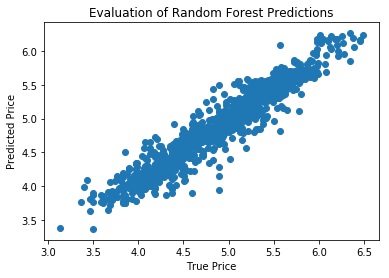

In [67]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test1, y_pred1_RF)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Random Forest Predictions')

As we can see that the previous plot shows a linear relationship between the predicted and the actual values of the listings' prices. 

In [68]:
from sklearn import metrics
MAE_RF = metrics.mean_absolute_error(y_test1, y_pred1_RF)
MSE_RF = metrics.mean_squared_error(y_test1, y_pred1_RF)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1_RF))

In [69]:
print('Mean Absolute Error:',MAE_RF)  
print('Mean Squared Error:',MSE_RF)  
print('Root Mean Squared Error:',RMSE_RF)  

Mean Absolute Error: 0.1278904956213602
Mean Squared Error: 0.032393782192114334
Root Mean Squared Error: 0.17998272748270688


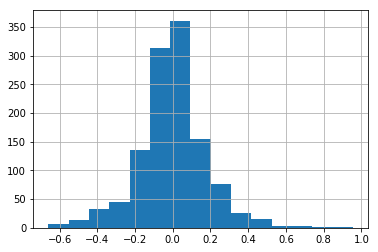

In [70]:
# let's evaluate the distribution of the errors: 
errors = y_test1 - y_pred1_RF
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

In [71]:
d = {'y':y_test1, 'y^':y_pred1_RF,'E_abs':abs(y_test1 - y_pred1_RF),'E^2':(y_test1 - y_pred1_RF)**2,'value_index': y_test1.index}
E = pd.DataFrame(data=d)

In [72]:
E = E.join(X_test1)

In [73]:
E = E.sort_values('E^2')

The best 10 predictions are:

In [74]:
E[0:10]

,y,y^,E_abs,E^2,value_index,Latitude,Longitude,ListingsNo_in_weekth,weeks_before_booking,Year_week,Bathrooms_num_int,Bedrooms_int,Beds_int,shared_bathroom,shared_room,Reviewers_no,Group_ID,avg_rating_stars,Amenities_length,Super_host
2154,4.624973,4.625075,0.000102,1.044158e-08,2154,40.79846,-73.95986,159,10,20,1.0,1.0,1,1,2,26,245,4.916667,34,0
1081,5.252273,5.252493,0.000220,4.829741e-08,1081,40.80138,-73.94413,151,28,38,1.0,1.0,1,0,0,73,44,4.916667,37,1
2584,4.158883,4.158487,0.000396,1.569706e-07,2584,40.69651,-73.96147,158,38,48,1.0,1.0,0,1,2,22,30,4.916667,23,0
3662,5.379897,5.379332,0.000565,3.197543e-07,3662,40.68860,-73.95884,152,34,44,1.0,2.0,2,0,0,21,30,5.000000,20,1
2302,5.605802,5.606458,0.000656,4.304570e-07,2302,40.74648,-73.97726,150,40,50,2.0,1.0,0,0,0,114,126,5.000000,19,1
2323,4.836282,4.835591,0.000691,4.780176e-07,2323,40.74793,-74.00691,152,34,44,1.0,1.0,1,1,2,131,25,4.833333,13,0
1961,4.736198,4.736902,0.000704,4.954112e-07,1961,40.72073,-73.97839,157,6,16,1.0,1.0,1,1,2,142,1,4.416667,26,0
356,4.852030,4.850992,0.001038,1.077868e-06,356,40.73362,-73.98920,149,4,14,1.0,1.0,1,1,2,242,223,4.833333,17,0
629,4.615121,4.613753,0.001368,1.870706e-06,629,40.78570,-73.97459,163,50,8,1.0,1.0,1,1,2,1,187,0.000000,24,1
2469,5.690359,5.688641,0.001718,2.952828e-06,2469,40.75925,-73.98994,158,38,48,1.0,1.0,1,0,0,27,174,5.000000,17,1


and the worst 10 predictions are:

In [75]:
E[-10:]

,y,y^,E_abs,E^2,value_index,Latitude,Longitude,ListingsNo_in_weekth,weeks_before_booking,Year_week,Bathrooms_num_int,Bedrooms_int,Beds_int,shared_bathroom,shared_room,Reviewers_no,Group_ID,avg_rating_stars,Amenities_length,Super_host
1641,5.017280,4.406051,0.611229,0.373601,1641,40.69091,-73.97202,159,10,20,1.0,1.0,1,0,2,13,61,5.000000,11,0
325,4.897840,4.280555,0.617285,0.381040,325,40.70088,-73.91836,168,0,10,1.0,1.0,1,1,2,18,153,5.000000,14,1
165,5.198497,4.558829,0.639668,0.409175,165,40.74630,-73.97926,163,50,8,1.0,1.0,1,0,2,98,126,5.000000,32,1
181,3.433987,4.085349,0.651362,0.424273,181,40.67335,-73.95391,168,0,10,1.0,1.0,1,1,2,10,36,4.416667,19,0
1462,3.850148,4.509344,0.659197,0.434540,1462,40.74551,-74.02776,152,12,22,1.0,1.0,1,1,2,47,81,4.666667,16,0
3861,5.780744,5.104699,0.676044,0.457036,3861,40.72609,-73.90112,145,26,36,2.0,3.0,3,0,0,71,111,4.916667,14,1
2669,4.595120,3.895562,0.699558,0.489382,2669,40.69946,-73.90833,147,22,32,1.0,1.0,2,1,2,71,153,4.916667,20,1
3201,4.897840,4.154949,0.742891,0.551887,3201,40.73100,-74.05900,163,46,4,1.0,1.5,0,0,2,30,86,4.916667,22,0
1302,5.572154,4.817698,0.754456,0.569204,1302,40.76623,-73.97985,135,8,18,1.0,1.0,1,0,2,-1,34,0.000000,1,0
767,4.897840,3.943220,0.954620,0.911299,767,40.71357,-74.07957,161,20,30,1.0,1.0,2,1,2,-1,89,0.000000,16,0


In [76]:
#E[E['E^2'] > 1000][:15]
#E[E['E^2'] > 1500][:15]
#E[E['E^2'] > 2000][:15]
#E[E['E^2'] > 3000][:15]
#Err_outliers[Err_outliers['y']>=400][0:50]
#Err_outliers[Err_outliers['y']<400][0:50]

### Feature Selection using RF

In [77]:
from sklearn.feature_selection import SelectFromModel

In [78]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 400))
sel.fit(X_train1, y_train1)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [79]:
sel.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False])

In [80]:
selected_feat= X_train1.columns[(sel.get_support())]
len(selected_feat)

3

In [81]:
print(selected_feat)

Index(['Latitude', 'Longitude', 'shared_room'], dtype='object')


### Decision Tree Regression (DT)

In [82]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth=2)

In [83]:
DT_regressor.fit(X_train1, y_train1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [84]:
y_pred_DT = DT_regressor.predict(X_test1)

In [85]:
MAE_DT = metrics.mean_absolute_error(y_test1, y_pred_DT)
MSE_DT = metrics.mean_squared_error(y_test1, y_pred_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_DT))

In [86]:
print('Mean Absolute Error:', MAE_DT)  
print('Mean Squared Error:',MSE_DT)  
print('Root Mean Squared Error:',RMSE_DT) 

Mean Absolute Error: 0.29629183495590783
Mean Squared Error: 0.143716160638882
Root Mean Squared Error: 0.3790991435480724


### Boosted Decision Tree Regression (XGBoost)

In [87]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [88]:
y_pred_XGB = xgb_model.predict(X_test1)

In [89]:
MAE_XGB = metrics.mean_absolute_error(y_test1, y_pred_XGB)
MSE_XGB = metrics.mean_squared_error(y_test1, y_pred_XGB)
RMSE_XGB = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_XGB))

In [90]:
print('Mean Absolute Error:', MAE_XGB)
print('Mean Squared Error:', MSE_XGB)  
print('Root Mean Squared Error:', RMSE_XGB)

Mean Absolute Error: 0.16997312467397319
Mean Squared Error: 0.049152272625088325
Root Mean Squared Error: 0.2217031182123705


### Neural Network Regression (NN)

In [91]:
from sklearn.neural_network import MLPRegressor
NN_regressor = MLPRegressor(activation='relu')

In [92]:
NN_regressor.fit(X_train1, y_train1)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
y_pred1_NN = NN_regressor.predict(X_test1)

In [94]:
MAE_NN = metrics.mean_absolute_error(y_test1, y_pred1_NN)
MSE_NN = metrics.mean_squared_error(y_test1, y_pred1_NN)
RMSE_NN = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1_NN))

In [95]:
print('Mean Absolute Error:',MAE_NN)
print('Mean Squared Error:', MSE_NN)  
print('Root Mean Squared Error:', RMSE_NN)

Mean Absolute Error: 0.3712948048803314
Mean Squared Error: 0.21007171455319262
Root Mean Squared Error: 0.4583358098089136


In [96]:
models= ["RF", "DT","XGboost","NN"]
models

['RF', 'DT', 'XGboost', 'NN']

In [97]:
Mean_Abs_Error =[MAE_RF ,MAE_DT ,MAE_XGB , MAE_NN]
Mean_Abs_Error

[0.1278904956213602,
 0.29629183495590783,
 0.16997312467397319,
 0.3712948048803314]

In [98]:
Mean_Sqrt_Error = [MSE_RF, MSE_DT, MSE_XGB, MSE_NN]
Mean_Sqrt_Error

[0.032393782192114334,
 0.143716160638882,
 0.049152272625088325,
 0.21007171455319262]

In [99]:
Root_Mean_Sqrd_Error = [RMSE_RF, RMSE_DT, RMSE_XGB, RMSE_NN]
Root_Mean_Sqrd_Error

[0.17998272748270688,
 0.3790991435480724,
 0.2217031182123705,
 0.4583358098089136]

In [100]:
d = {'model': models,'Mean_Abs_Error': Mean_Abs_Error,'Mean_Sqrt_Error': Mean_Sqrt_Error,'Root_Mean_Sqrd_Error':Root_Mean_Sqrd_Error}

In [101]:
pd.DataFrame(data=d)

,model,Mean_Abs_Error,Mean_Sqrt_Error,Root_Mean_Sqrd_Error
0,RF,0.127890,0.032394,0.179983
1,DT,0.296292,0.143716,0.379099
2,XGboost,0.169973,0.049152,0.221703
3,NN,0.371295,0.210072,0.458336


## Parameters Tuning with Random Hyperparameter Grid Search

### Random Forest Regression

In [102]:
from pprint import pprint

In [103]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:



NameError: name 'rf_classifier' is not defined

In [104]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [105]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [106]:
pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [107]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [108]:
#Fit the random search model
rf_random.fit(X_train1,y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [109]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [110]:
y_pred1_RF = rf_random.predict(X_test1)

In [111]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test1, y_pred1_RF))  
print('Mean Squared Error:',metrics.mean_squared_error(y_test1, y_pred1_RF))  
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test1, y_pred1_RF)))  

Mean Absolute Error: 0.13055139382117245
Mean Squared Error: 0.033125443664109466
Root Mean Squared Error: 0.1820039660669774


Let's call the same metrics before tuning:

In [112]:
print('Mean Absolute Error:',MAE_RF)  
print('Mean Squared Error:',MSE_RF)  
print('Root Mean Squared Error:',RMSE_RF)

Mean Absolute Error: 0.1278904956213602
Mean Squared Error: 0.032393782192114334
Root Mean Squared Error: 0.17998272748270688


### Bangkok

In [114]:
Bngkok_X = BangkokData[Selected_list]
Bngkok_Y = BangkokData['log_price']

In [115]:
Bngkok_X.columns

Index(['Latitude', 'Longitude', 'ListingsNo_in_weekth', 'weeks_before_booking',
       'Year_week', 'Bathrooms_num_int', 'Bedrooms_int', 'Beds_int',
       'shared_bathroom', 'shared_room', 'Reviewers_no', 'Group_ID',
       'avg_rating_stars', 'Amenities_length', 'Super_host'],
      dtype='object')

In [116]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Bngkok_X,Bngkok_Y,test_size=0.3, random_state=5)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(5425, 15)
(2326, 15)
(5425,)
(2326,)


### Random Forest Regression

In [117]:
rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=5)


In [118]:
rf_classifier.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [119]:
y_pred2_RFR = rf_classifier.predict(X_test2)

In [120]:
df = pd.DataFrame({'Actual':y_test2, 'Predicted': y_pred2_RFR})  
df.head(10)

,Actual,Predicted
3213,4.430817,4.428523
1445,3.988984,4.334381
3913,3.761200,3.745371
6396,4.060443,4.057164
7175,4.094345,4.201492
3067,3.496508,3.530346
4280,3.871201,3.866609
1290,4.762174,4.736880
1075,3.526361,3.581072
7559,4.189655,4.185123


In [121]:
MAE_RF =  metrics.mean_absolute_error(y_test2, y_pred2_RFR)
MSE_RF = metrics.mean_squared_error(y_test2, y_pred2_RFR)  
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2_RFR))

In [122]:
from sklearn import metrics  
print('Mean Absolute Error:', MAE_RF)  
print('Mean Squared Error:', MSE_RF)  
print('Root Mean Squared Error:', RMSE_RF)  

Mean Absolute Error: 0.05561754034792597
Mean Squared Error: 0.012959493530091879
Root Mean Squared Error: 0.11383977130200094


### Decision Tree Regression

In [123]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth=2)

In [124]:
DT_regressor.fit(X_train2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
y_pred2_DT = DT_regressor.predict(X_test2)

In [126]:
MAE_DT = metrics.mean_absolute_error(y_test2, y_pred2_DT)
MSE_DT = metrics.mean_squared_error(y_test2, y_pred2_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2_DT))

In [127]:
print('Mean Absolute Error:', MAE_DT)  
print('Mean Squared Error:', MSE_DT)  
print('Root Mean Squared Error:', RMSE_DT)

Mean Absolute Error: 0.28998126704547356
Mean Squared Error: 0.14070337944125821
Root Mean Squared Error: 0.37510449136375085


### Boosted Decision Tree Regression (XGBoost)

In [128]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [129]:
xgb_model.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [130]:
y_pred2_XGB = xgb_model.predict(X_test2)

In [131]:
MAE_XGB = metrics.mean_absolute_error(y_test2, y_pred2_XGB)
MSE_XGB = metrics.mean_squared_error(y_test2, y_pred2_XGB)
RMSE_XGB = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2_XGB))

In [132]:
print('Mean Absolute Error:', MAE_XGB)  
print('Mean Squared Error:', MSE_XGB )  
print('Root Mean Squared Error:',RMSE_XGB) 

Mean Absolute Error: 0.159028549712454
Mean Squared Error: 0.04358807622117535
Root Mean Squared Error: 0.20877757595387333


### Neural Network Regression

In [133]:
from sklearn.neural_network import MLPRegressor
NN_regressor = MLPRegressor(activation='relu')

In [134]:
NN_regressor.fit(X_train2, y_train2)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [135]:
y_pred2_NN = NN_regressor.predict(X_test2)

In [136]:
MAE_NN = metrics.mean_absolute_error(y_test2, y_pred2_NN)
MSE_NN = metrics.mean_squared_error(y_test2, y_pred2_NN)
RMSE_NN = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2_NN))

In [137]:
print('Mean Absolute Error:', MAE_NN)  
print('Mean Squared Error:', MSE_NN)  
print('Root Mean Squared Error:', RMSE_NN) 

Mean Absolute Error: 0.2983541505210133
Mean Squared Error: 0.13925086497501757
Root Mean Squared Error: 0.37316332211917286


In [138]:
Mean_Abs_Error =[MAE_RF ,MAE_DT ,MAE_XGB , MAE_NN]
Mean_Sqrt_Error = [MSE_RF, MSE_DT, MSE_XGB, MSE_NN]
Root_Mean_Sqrd_Error = [RMSE_RF, RMSE_DT, RMSE_XGB, RMSE_NN]

In [139]:
d = {'model': models,'Mean_Abs_Error': Mean_Abs_Error,'Mean_Sqrt_Error': Mean_Sqrt_Error,'Root_Mean_Sqrd_Error':Root_Mean_Sqrd_Error}

In [140]:
pd.DataFrame(data=d)

,model,Mean_Abs_Error,Mean_Sqrt_Error,Root_Mean_Sqrd_Error
0,RF,0.055618,0.012959,0.113840
1,DT,0.289981,0.140703,0.375104
2,XGboost,0.159029,0.043588,0.208778
3,NN,0.298354,0.139251,0.373163


### Cairo

In [141]:
Cairo_X = CairoData[Selected_list]
Cairo_Y = CairoData['log_price']

In [142]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Cairo_X,Cairo_Y,test_size=0.3, random_state=5)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(5531, 15)
(2371, 15)
(5531,)
(2371,)


### Random Forest Regression

In [143]:
rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=5)
rf_classifier.fit(X_train3, y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [144]:
y_pred3_RFR = rf_classifier.predict(X_test3)

In [145]:
df = pd.DataFrame({'Actual':y_test3, 'Predicted': y_pred3_RFR})  
df.head(10)

,Actual,Predicted
3564,4.219508,4.193497
6015,3.688879,3.671747
7518,2.995732,3.171762
4707,4.204693,4.180290
4272,4.077537,4.086751
7715,3.218876,3.095372
6862,4.787492,3.363197
2617,2.564949,2.581143
2005,4.356709,4.355123
855,3.688879,3.718120


In [146]:
from sklearn import metrics 
MAE_RF =  metrics.mean_absolute_error(y_test3, y_pred3_RFR)
MSE_RF =  metrics.mean_squared_error(y_test3, y_pred3_RFR)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3_RFR))

In [147]:
 
print('Mean Absolute Error:', MAE_RF)  
print('Mean Squared Error:',MSE_RF)  
print('Root Mean Squared Error:',RMSE_RF) 

Mean Absolute Error: 0.06944438421025623
Mean Squared Error: 0.02959128107632378
Root Mean Squared Error: 0.17202116461739173


### Decision Tree Regression

In [148]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth=2)

In [149]:
DT_regressor.fit(X_train3, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [150]:
y_pred3_DT = DT_regressor.predict(X_test3)

In [151]:
MAE_DT = metrics.mean_absolute_error(y_test3, y_pred3_DT)
MSE_DT = metrics.mean_squared_error(y_test3, y_pred3_DT)
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3_DT))

In [152]:
print('Mean Absolute Error:',MAE_DT)  
print('Mean Squared Error:', MSE_DT)  
print('Root Mean Squared Error:',RMSE_DT)

Mean Absolute Error: 0.3871718037108805
Mean Squared Error: 0.2482136043911593
Root Mean Squared Error: 0.4982104017291884


### Boosted Decision Tree Regression (XGBoost)

In [153]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [154]:
xgb_model.fit(X_train3, y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [155]:
y_pred3_XGB = xgb_model.predict(X_test3)

In [156]:
MAE_XGB = metrics.mean_absolute_error(y_test3, y_pred3_XGB)
MSE_XGB = metrics.mean_squared_error(y_test3, y_pred3_XGB)
RMSE_XGB = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3_XGB))

In [157]:
print('Mean Absolute Error:',MAE_XGB)  
print('Mean Squared Error:',MSE_XGB)  
print('Root Mean Squared Error:',RMSE_XGB) 

Mean Absolute Error: 0.2604976372428251
Mean Squared Error: 0.11638892520605904
Root Mean Squared Error: 0.34115821140060376


### Neural Network Regression

In [158]:
from sklearn.neural_network import MLPRegressor
NN_regressor = MLPRegressor(activation='relu')

In [159]:
NN_regressor.fit(X_train3, y_train3)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [160]:
y_pred3_NN = NN_regressor.predict(X_test3)

In [161]:
MAE_NN = metrics.mean_absolute_error(y_test3, y_pred3_NN)
MSE_NN = metrics.mean_squared_error(y_test3, y_pred3_NN)
RMSE_NN = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3_NN))

In [162]:
print('Mean Absolute Error:',MAE_NN)  
print('Mean Squared Error:',MSE_NN)  
print('Root Mean Squared Error:',RMSE_NN)

Mean Absolute Error: 0.39929648515721805
Mean Squared Error: 0.26162305493580795
Root Mean Squared Error: 0.5114910115884813


In [163]:
Mean_Abs_Error =[MAE_RF ,MAE_DT ,MAE_XGB , MAE_NN]
Mean_Sqrt_Error = [MSE_RF, MSE_DT, MSE_XGB, MSE_NN]
Root_Mean_Sqrd_Error = [RMSE_RF, RMSE_DT, RMSE_XGB, RMSE_NN]

In [164]:
d = {'model': models,'Mean_Abs_Error': Mean_Abs_Error,'Mean_Sqrt_Error': Mean_Sqrt_Error,'Root_Mean_Sqrd_Error':Root_Mean_Sqrd_Error}

In [165]:
pd.DataFrame(data=d)

,model,Mean_Abs_Error,Mean_Sqrt_Error,Root_Mean_Sqrd_Error
0,RF,0.069444,0.029591,0.172021
1,DT,0.387172,0.248214,0.498210
2,XGboost,0.260498,0.116389,0.341158
3,NN,0.399296,0.261623,0.511491
